# Pandemic Learning Loss Among Disadvantaged Pennsylvania Students
## Grace Sam, Masahiko Shinjo, Gareth Minson

## 1. Importing data

In [1]:
#importing packages
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly import data as dt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
#importing and formatting the cleaned data columns
data = pd.read_csv('all_data.csv', index_col = 0)
v = data.columns
w = v.str.lstrip()
w = w.str.replace('_', '')
rename = {v:w for (v,w) in zip(v,w)}
data.rename(rename, axis = 1, inplace = True)
data['BROADBAND USAGE'] = data['BROADBAND USAGE']*100
data.head()

County  number18  %adv18  %prof18  %bas18  %belbas18  number22  %adv22  \
0      ADAMS      83.0   17.60     38.3    28.6       9.60     112.0   15.90   
1  ALLEGHENY      61.0   17.15     32.9    24.5       9.85      58.0   13.25   
2  ARMSTRONG      85.5   19.15     40.9    27.4       7.95      72.5   15.65   
3     BEAVER      79.0   14.80     37.7    27.0      12.20      77.0   11.40   
4    BEDFORD      68.0   14.30     38.1    31.4       9.20      69.0   14.10   

   %prof22  %bas22  %belbas22  10 to 14 year olds enrolled in school  \
0    36.55   30.05      17.05                                 5305.0   
1    29.30   25.40      15.80                                59856.0   
2    37.90   29.00      12.10                                 3073.0   
3    33.30   29.50      18.00                                 9066.0   
4    32.90   29.20      15.20                                    NaN   

   15 to 17 year olds enrolled in school  5 to 9 year olds enrolled in school  \
0                                 4161.0                               5034.0   
1                                38359.0                              61209.0   
2                                 2258.0                               3812.0   
3                                 5852.0                               7693.0   
4                                    NaN                                  NaN   

   BROADBAND USAGE  Population  Median Income  
0            24.50    103852.0          67253  
1            47.90   1250578.0          61043  
2            24.00     65558.0          51410  
3            30.75    168215.0          57807  
4            12.25     47577.0          50509

In [3]:
#Viewing the distribution of Income and Broadband usage for grouping
print(data['Median Income'].describe(), 
     '--- \n',
     data['BROADBAND USAGE'].describe(),
     '--- \n',
     data['Population'])

count        67.000000
mean      57056.089552
std       11008.423125
min       39717.000000
25%       50211.500000
50%       53476.000000
75%       62211.000000
max      100214.000000
Name: Median Income, dtype: float64 --- 
 count    67.000000
mean     26.318657
std      17.362697
min       2.800000
25%      13.950000
50%      21.000000
75%      32.075000
max      77.000000
Name: BROADBAND USAGE, dtype: float64 --- 
 0      103852.0
1     1250578.0
2       65558.0
3      168215.0
4       47577.0
        ...    
62     209349.0
63      51155.0
64     354663.0
65      26069.0
66     456438.0
Name: Population, Length: 67, dtype: float64


In [4]:
#grouping income and broadband usage
data['Median Income Group']= pd.cut(data['Median Income'], 
                                        bins=[39000,50000,65000,80000,120000], 
                                        labels=['Very Low','Low','Moderate','High'])

data['Broadband Speed Category'] = pd.cut(data['BROADBAND USAGE'], 
                                        bins=[0,20,40,60,80], 
                                        labels=['Very Low','Low', 'Moderate', 'High'])

data['Population Category'] = pd.cut(data["Population"], 
                                        bins=[0,50000,100000,200000,2000000], 
                                        labels=['Very Low','Low', 'Moderate', 'High'])

In [5]:
#calculating difference from 2018 to 2022 across the four testing categories
data['Below Basic Change'] = data['%belbas22'] - data['%belbas18']
data['Basic Change'] = data['%bas22'] - data['%bas18']
data['Proficient Change'] = data['%prof22'] - data['%prof18']
data['Advanced Change'] = data['%adv22'] - data['%adv18']

In [6]:
data

County  number18  %adv18  %prof18  %bas18  %belbas18  number22  \
0          ADAMS      83.0   17.60     38.3    28.6       9.60     112.0   
1      ALLEGHENY      61.0   17.15     32.9    24.5       9.85      58.0   
2      ARMSTRONG      85.5   19.15     40.9    27.4       7.95      72.5   
3         BEAVER      79.0   14.80     37.7    27.0      12.20      77.0   
4        BEDFORD      68.0   14.30     38.1    31.4       9.20      69.0   
..           ...       ...     ...      ...     ...        ...       ...   
62    WASHINGTON      83.0   19.70     38.6    26.0       7.10      77.0   
63         WAYNE      41.0   21.90     36.1    25.4       5.60      39.0   
64  WESTMORELAND      92.0   23.20     38.6    22.6       6.60      86.0   
65       WYOMING      68.0   19.60     37.3    26.8      11.10      94.5   
66          YORK      71.0   17.40     35.3    27.0      11.30      70.0   

    %adv22  %prof22  %bas22  ...  BROADBAND USAGE  Population  Median Income  \
0    15.90    36.55   30.05  ...            24.50    103852.0          67253   
1    13.25    29.30   25.40  ...            47.90   1250578.0          61043   
2    15.65    37.90   29.00  ...            24.00     65558.0          51410   
3    11.40    33.30   29.50  ...            30.75    168215.0          57807   
4    14.10    32.90   29.20  ...            12.25     47577.0          50509   
..     ...      ...     ...  ...              ...         ...            ...   
62   15.30    36.70   27.30  ...            24.70    209349.0          63543   
63   24.80    34.40   26.10  ...            25.00     51155.0          56096   
64   18.85    35.55   25.95  ...            31.75    354663.0          60471   
65   14.75    31.75   31.40  ...            18.00     26069.0          59415   
66   14.60    31.80   28.80  ...            43.20    456438.0          66457   

    Median Income Group  Broadband Speed Category  Population Category  \
0              Moderate                       Low             Moderate   
1                   Low                  Moderate                 High   
2                   Low                       Low                  Low   
3                   Low                       Low             Moderate   
4                   Low                  Very Low             Very Low   
..                  ...                       ...                  ...   
62                  Low                       Low                 High   
63                  Low                       Low                  Low   
64                  Low                       Low                 High   
65                  Low                  Very Low             Very Low   
66             Moderate                  Moderate                 High   

    Below Basic Change Basic Change Proficient Change Advanced Change  
0                 7.45         1.45             -1.75           -1.70  
1                 5.95         0.90             -3.60           -3.90  
2                 4.15         1.60             -3.00           -3.50  
3                 5.80         2.50             -4.40           -3.40  
4                 6.00        -2.20             -5.20           -0.20  
..                 ...          ...               ...             ...  
62                4.00         1.30             -1.90           -4.40  
63                6.20         0.70             -1.70            2.90  
64                4.50         3.35             -3.05           -4.35  
65                8.15         4.60             -5.55           -4.85  
66                6.50         1.80             -3.50           -2.80  

[67 rows x 24 columns]

In [7]:
#importing shape data and formatting column name for joining
pa = gp.read_file('Spatial Data/tlgdb_a_42_pa_County_2020.shp')
pa[['County', 'NAMELSAD']] = pa['NAMELSAD'].astype(str).str.split(' ', expand = True)
pa.drop(['NAMELSAD'], axis = 1, inplace = True)
pa['County'] = pa['County'].str.upper()
pa.head()

COUNTYNS  GEOID CLASSFP FUNCSTAT         ALAND      AWATER     INTPTLAT  \
0  01214112  42007      H1        A  1.125855e+09  24162295.0  +40.6841401   
1  01213669  42053      H1        A  1.106596e+09   8369675.0  +41.5133040   
2  01209189  42117      H1        A  2.936541e+09   8279675.0  +41.7668593   
3  01213667  42043      H1        A  1.359407e+09  86209037.0  +40.4125646   
4  01213692  42127      H1        A  1.879734e+09  64785676.0  +41.6466021   

      INTPTLON                                           geometry   County  
0  -80.3507209  POLYGON ((-80.51896 40.73374, -80.51896 40.734...   BEAVER  
1  -79.2497050  POLYGON ((-79.20499 41.62641, -79.20129 41.626...   FOREST  
2  -77.2572881  POLYGON ((-77.43967 42.00012, -77.43758 42.000...    TIOGA  
3  -76.7926343  POLYGON ((-76.98439 40.51457, -76.98441 40.514...  DAUPHIN  
4  -75.2924932  POLYGON ((-75.45976 41.59504, -75.45980 41.595...    WAYNE

In [8]:
#Joining data and shapefile
joined = pd.merge(pa, data, on = 'County', how = 'left')
joined.head()

COUNTYNS  GEOID CLASSFP FUNCSTAT         ALAND      AWATER     INTPTLAT  \
0  01214112  42007      H1        A  1.125855e+09  24162295.0  +40.6841401   
1  01213669  42053      H1        A  1.106596e+09   8369675.0  +41.5133040   
2  01209189  42117      H1        A  2.936541e+09   8279675.0  +41.7668593   
3  01213667  42043      H1        A  1.359407e+09  86209037.0  +40.4125646   
4  01213692  42127      H1        A  1.879734e+09  64785676.0  +41.6466021   

      INTPTLON                                           geometry   County  \
0  -80.3507209  POLYGON ((-80.51896 40.73374, -80.51896 40.734...   BEAVER   
1  -79.2497050  POLYGON ((-79.20499 41.62641, -79.20129 41.626...   FOREST   
2  -77.2572881  POLYGON ((-77.43967 42.00012, -77.43758 42.000...    TIOGA   
3  -76.7926343  POLYGON ((-76.98439 40.51457, -76.98441 40.514...  DAUPHIN   
4  -75.2924932  POLYGON ((-75.45976 41.59504, -75.45980 41.595...    WAYNE   

   ...  BROADBAND USAGE  Population  Median Income  Median Income Group  \
0  ...            30.75    168215.0          57807                  Low   
1  ...             7.75      6973.0          39717             Very Low   
2  ...            13.80     41045.0          51324                  Low   
3  ...            51.40    286401.0          60715                  Low   
4  ...            25.00     51155.0          56096                  Low   

   Broadband Speed Category  Population Category  Below Basic Change  \
0                       Low             Moderate                5.80   
1                  Very Low             Very Low                1.65   
2                  Very Low             Very Low                3.55   
3                  Moderate                 High                7.60   
4                       Low                  Low                6.20   

   Basic Change  Proficient Change  Advanced Change  
0          2.50              -4.40            -3.40  
1          8.35               0.35             0.00  
2          1.25              -4.45            -0.95  
3          1.80              -3.10            -3.40  
4          0.70              -1.70             2.90  

[5 rows x 33 columns]

## 2.1 Analyzing broadband and test score

In [9]:
#Calculating the average difference across testing levels by broadband category
dataSpeed = data.drop(['County', 'Median Income Group','Population Category'], axis = 1)
dataSpeed = dataSpeed.groupby(by = 'Broadband Speed Category', observed = True).mean()
dataSpeed = dataSpeed.reset_index(names = 'Broadband Speed Category')
dataSpeed[['Below Basic Change Broadband Category', 'Basic Change Broadband Category', 'Proficient Change Broadband Category', 'Advanced Change Broadband Category']] = dataSpeed[['Below Basic Change', 'Basic Change', 'Proficient Change', 'Advanced Change']]
dataSpeed[['Broadband Speed Category', 'Below Basic Change Broadband Category', 'Basic Change Broadband Category', 'Proficient Change Broadband Category', 'Advanced Change Broadband Category']]
dataSpeed.head(4)

Broadband Speed Category   number18     %adv18    %prof18     %bas18  \
0                 Very Low  67.274194  16.445161  36.761290  27.975806   
1                      Low  79.958333  17.150000  36.960417  27.231250   
2                 Moderate  89.625000  15.331250  34.337500  27.000000   
3                     High  86.750000  24.650000  36.112500  22.150000   

   %belbas18   number22   %adv22    %prof22     %bas22  ...     Population  \
0  10.541935  67.693548  13.2500  33.972581  30.312903  ...   55670.129032   
1  10.435417  76.645833  14.0250  33.400000  29.372917  ...  177924.833333   
2  12.925000  86.687500  12.1250  30.281250  28.956250  ...  549049.500000   
3   7.237500  82.250000  19.8375  33.625000  25.412500  ...  653583.500000   

   Median Income  Below Basic Change  Basic Change  Proficient Change  \
0   52103.677419            6.043548      2.337097          -2.788710   
1   56399.958333            6.260417      2.141667          -3.560417   
2   62321.125000            6.981250      1.956250          -4.056250   
3   88844.000000            4.837500      3.262500          -2.487500   

   Advanced Change  Below Basic Change Broadband Category  \
0        -3.195161                               6.043548   
1        -3.125000                               6.260417   
2        -3.206250                               6.981250   
3        -4.812500                               4.837500   

   Basic Change Broadband Category  Proficient Change Broadband Category  \
0                         2.337097                             -2.788710   
1                         2.141667                             -3.560417   
2                         1.956250                             -4.056250   
3                         3.262500                             -2.487500   

   Advanced Change Broadband Category  
0                           -3.195161  
1                           -3.125000  
2                           -3.206250  
3                           -4.812500  

[4 rows x 25 columns]

In [10]:
#reformatting test score change
dataSpeed2 = pd.melt(dataSpeed, 
                    id_vars = ['Broadband Speed Category'],
                    value_vars = ['Below Basic Change', 'Basic Change', 'Proficient Change', 'Advanced Change'])
data2 = pd.melt(dataSpeed, 
                    id_vars = ['Broadband Speed Category', 'BROADBAND USAGE'],
                    value_vars = ['Below Basic Change Broadband Category', 'Basic Change Broadband Category', 
                                  'Proficient Change Broadband Category', 'Advanced Change Broadband Category'])
#make chart for below basic change by internet category
fig = plt.figure(figsize = (50,50))
fig = px.histogram(data2.loc[data2['variable'] == 'Below Basic Change Broadband Category'], x = 'variable', y = 'value', color = 'Broadband Speed Category', 
                   barmode = 'group',
                  color_discrete_sequence=['#708D80','#FDCDAC', '#CBD5E8', '#F6AFD3'])

fig.update_layout(
    title= "Lowest Learning Loss in Counties with Best Internet Acess",
    title_font_size = 25,
    title_font_color = 'black',
    paper_bgcolor ='white',
    plot_bgcolor = 'white')
        
fig.update_xaxes(title = '',
                tickmode = 'array',
                tickangle = 0,
                tickvals = ['Below Basic Change Broadband Category'],
                ticktext = ['Below Basic Level Test Scores']
                )

fig.update_yaxes(
                title = 'Average Percent Increase 2018-22',
                title_font_color = 'black',
                title_font_size = 15
                )
fig.show()

<Figure size 5000x5000 with 0 Axes>

## 2.2 Analyzing Income and test score

In [11]:
#Creating income group x learning loss df for plotting
df = data.groupby(by = 'Median Income Group',as_index = False)[['%belbas18','%belbas22']].mean()

id_vars = 'Median Income Group'
var_name = ['%belbas18','%belbas22']
value_name = "Counts"

temp_melted = pd.melt(df, id_vars, 
                var_name, 
                value_name)
temp_melted.rename({'Median Income Group':'MedianIncomeGroup'},inplace=True,axis=1)
temp_melted

MedianIncomeGroup     Counts      value
0          Very Low  %belbas18  10.984375
1               Low  %belbas18  10.988750
2          Moderate  %belbas18   9.631250
3              High  %belbas18   5.750000
4          Very Low  %belbas22  17.328125
5               Low  %belbas22  17.388750
6          Moderate  %belbas22  15.031250
7              High  %belbas22   9.783333

In [12]:
#plotting dumbell plots for change in below basic scores over time by income group
countries = (
    temp_melted["MedianIncomeGroup"]
    .unique()
)

data_dict = {"line_x": [], "line_y": [], "% in Below Basic Category in 2018": [], "% in Below Basic Category in 2022": [], "colors": [], "Counts": [], "countries": []}

for x in countries:
    data_dict["% in Below Basic Category in 2018"].extend([temp_melted.loc[(temp_melted.Counts == '%belbas18') & (temp_melted.MedianIncomeGroup == x)]["value"].values[0]])
    data_dict["% in Below Basic Category in 2022"].extend([temp_melted.loc[(temp_melted.Counts == '%belbas22') & (temp_melted.MedianIncomeGroup == x)]["value"].values[0]])
    data_dict["line_x"].extend(
        [
            temp_melted.loc[(temp_melted.Counts == '%belbas18') & (temp_melted.MedianIncomeGroup == x)]["value"].values[0],
            temp_melted.loc[(temp_melted.Counts == '%belbas22') & (temp_melted.MedianIncomeGroup == x)]["value"].values[0],
            None,
        ]
    )
    data_dict["line_y"].extend([x, x, None]),

fig = go.Figure(
    data=[
        go.Scatter(
            x=data_dict["line_x"],
            y=data_dict["line_y"],
            mode="lines",
            showlegend=False,
            marker=dict(
                color="black"
            )
        ),
        go.Scatter(
            x=data_dict["% in Below Basic Category in 2018"],
            y=countries,
            mode="markers",
            name="2018",
            marker=dict(
                color='rgba(38, 24, 74, 0.8)',
                size=10
            )
# 'rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)','rgba(122, 120, 168, 0.8)'           
        ),
        go.Scatter(
            x=data_dict["% in Below Basic Category in 2022"],
            y=countries,
            mode="markers",
            name="2022",
            marker=dict(
                color='rgba(122, 120, 168, 0.8)' ,
                size=10
            )   
        ),
    ]
)

fig.update_layout(yaxis_title="Income Group",xaxis_title="% Students in Below-Basic Score Category",
    font=dict(
        family="Arial",
        size=10,
        color="black"
    ),
    autosize=False,
    width=500,
    height=300,
    title="% of Students in Below-Basic Score Category in Each Income Group",
    #height=300,
    legend_itemclick=False,
    paper_bgcolor='white',
    plot_bgcolor='white',
   xaxis=dict(showgrid=False),
   yaxis=dict(showgrid=False)
)

fig.show()

## 2.3 Analyzing population density and test score

In [13]:
#creating pop by below basic change for plotting
dataPop=data[[ 'Below Basic Change', 'Basic Change', 'Proficient Change', 'Advanced Change', 'Population','Population Category']]
dataPop = dataPop.groupby(by = 'Population Category', observed = True).mean()
dataPop.reset_index(inplace=True)
dataPop = pd.melt(dataPop,id_vars = ['Population Category', 'Population'],var_name="Test score category")
dataPop=dataPop[dataPop["Test score category"]=="Below Basic Change"]

dataPop

Population Category     Population Test score category     value
0            Very Low   31596.608696  Below Basic Change  6.193478
1                 Low   70364.384615  Below Basic Change  5.892308
2            Moderate  141885.000000  Below Basic Change  5.850000
3                High  528707.555556  Below Basic Change  6.538889

In [14]:
#plotting population category
fig = px.histogram(dataPop, x = 'Test score category', y = 'value', color = "Population Category", barmode = 'group',
                  color_discrete_sequence=['#708D80','#FDCDAC', '#CBD5E8', '#F6AFD3'])


fig.update_layout(
    title= "Population density has less impact on test score change",
    title_font_size = 25,
    title_font_color = 'black',
    paper_bgcolor ='white',
    plot_bgcolor = 'white')
        
fig.update_xaxes(title = 'Test Score Achievement Level',
                tickmode = 'array',
                ticktext = ['Below Basic Increase', 'Basic Increase', 
                           'Proficient Decline', 'Advanced Decline']
                )

fig.update_yaxes(
                title = 'Average Percent at Level'
                )
fig.show()

## 2.4 Country story

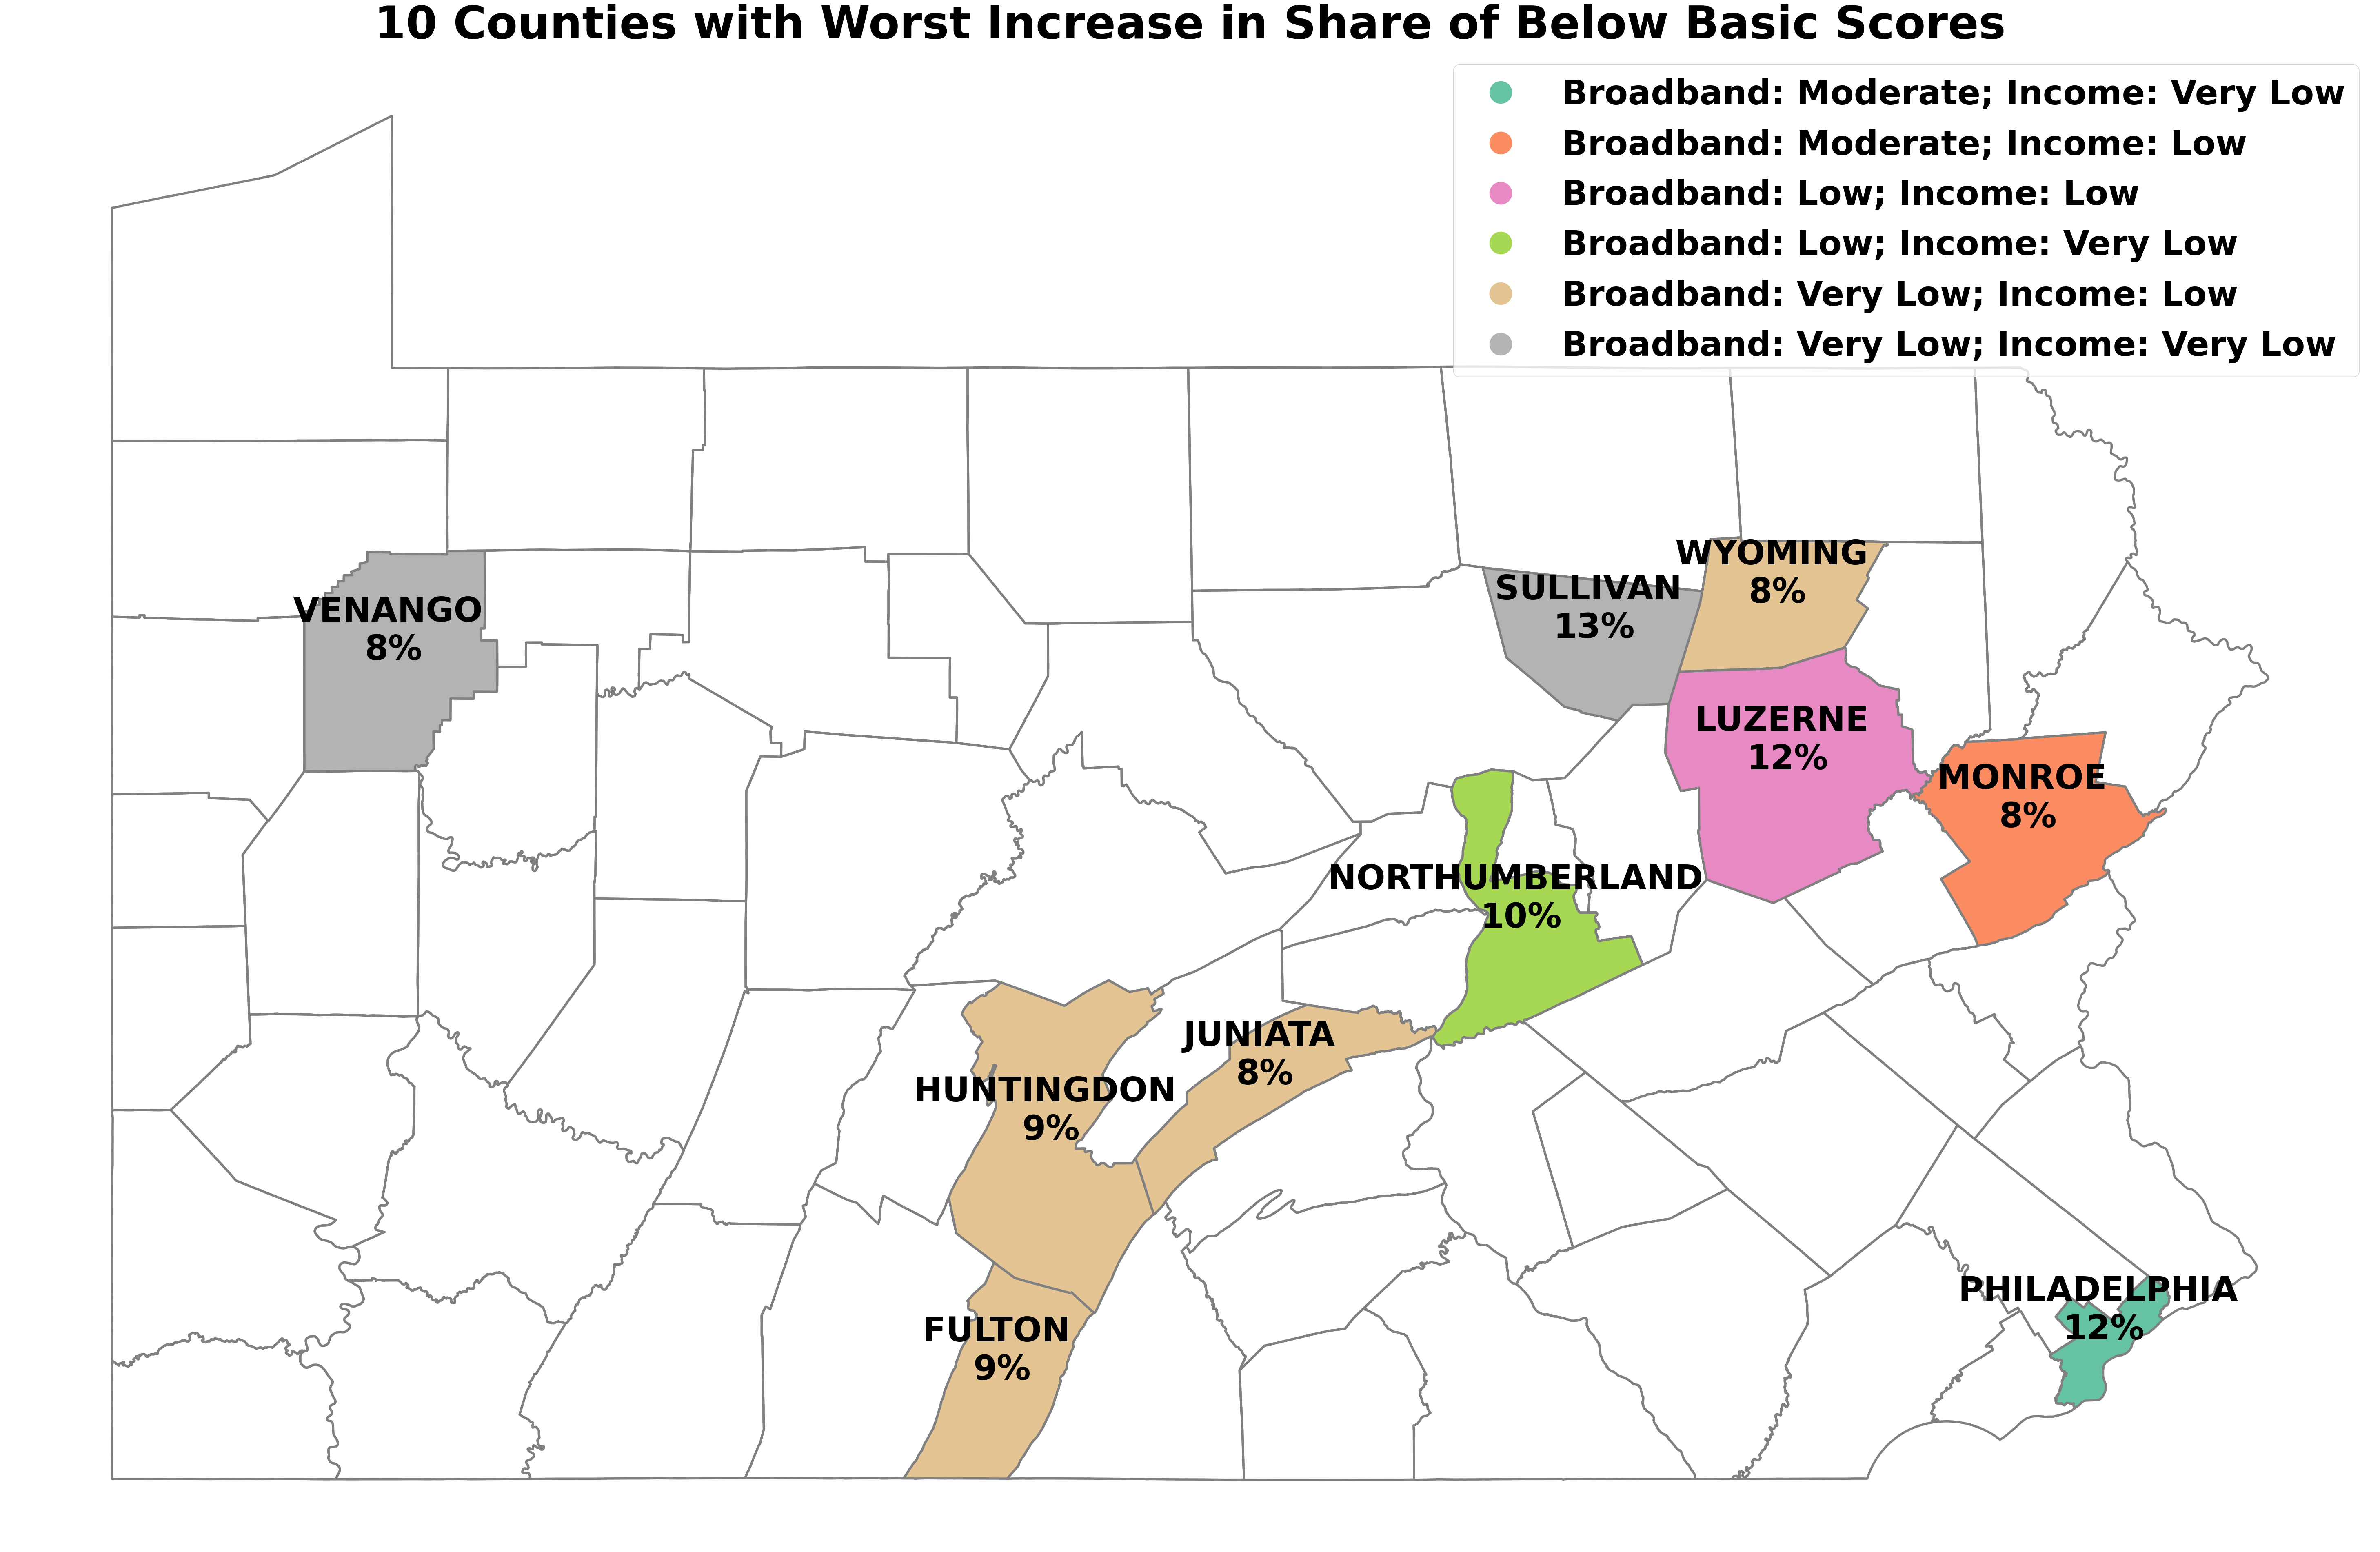

In [15]:
#creating a worst 10 county map with income and broadband categories
bottom10 = joined.sort_values(by = 'Below Basic Change', ascending = False).head(10)
bottom10['Broadband Speed and Income Category'] = 'Broadband: ' + bottom10['Broadband Speed Category'].astype(str) + '; Income: ' + bottom10['Median Income Group'].astype(str)
bottom10['County Increase'] = bottom10['County'].astype(str) + ' \n' + bottom10['Below Basic Change'].astype(int).astype(str) + '%'
bottom10 = bottom10.sort_values(by = 'Broadband Speed and Income Category', ascending = False)
categories = ['Broadband: Moderate; Income: Very Low', 'Broadband: Moderate; Income: Low', 
              'Broadband: Low; Income: Low', 'Broadband: Low; Income: Very Low',
             'Broadband: Very Low; Income: Low','Broadband: Very Low; Income: Very Low']

fig, ax = plt.subplots(1, 1, figsize=(75, 75), frameon = False)
joined.geometry.boundary.plot(ax=ax, edgecolor='grey', linewidth = 4)
bottom10.plot(column='Broadband Speed and Income Category', cmap = 'Set2',
          ax=ax, categorical=True, categories = categories,
          legend=True, legend_kwds={'loc': 'upper right', 'fontsize': 60, 'markerscale': 4.0})
plt.title('10 Counties with Worst Increase in Share of Below Basic Scores', size = 80)
bottom10.apply(lambda x: ax.annotate(text=x['County Increase'], 
                        xy=x.geometry.centroid.coords[0], ha='center', fontsize = 60), axis=1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_axis_off()
plt.show();

# References
- https://www.pasda.psu.edu/download/census/
- https://geopandas.org/en/stable/docs/user_guide/mapping.html#creating-a-legend
- Geospatial Lecture
- Lab 4
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://www.fcc.gov/reports-research/reports/broadband-progress-reports/2015-broadband-progress-report
- https://stackoverflow.com/questions/49728421/pandas-dataframe-settingwithcopywarning-a-value-is-trying-to-be-set-on-a-copy
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
- https://www.geeksforgeeks.org/python-dictionary-comprehension/#
- https://www.geeksforgeeks.org/select-all-columns-except-one-given-column-in-a-pandas-dataframe/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
- https://plotly.com/python/bubble-maps/
- https://plotly.com/python/dumbbell-plots/
- https://community.plotly.com/t/how-to-make-dumbbell-plots-in-plotly-python/47762/2
- Preattentive Features Lecture
- https://stackoverflow.com/questions/46173419/change-bar-color-according-to-hue-name
- https://www.geeksforgeeks.org/bar-chart-using-plotly-in-python/
- https://stackoverflow.com/questions/42535785/python-plotly-how-to-remove-background-horizontal-line
- https://stackoverflow.com/questions/56712486/how-to-hide-legend-with-plotly-express-and-plotly
- https://python-charts.com/ranking/bar-chart-plotly/
- PreAttentiveFeatures_P1_inclassEx_Grace_Sharon_Sami
- https://stackoverflow.com/questions/71052703/how-to-plot-a-horizontal-stacked-bar-plot-using-plotly-python
- https://plotly.com/python/horizontal-bar-charts/
- https://www.flatuicolorpicker.com/red-rgba-color-model/
- https://plotly.com/python/dumbbell-plots/
- https://stackoverflow.com/questions/47897607/groupby-a-dataframe-into-a-new-dataframe-with-arange-as-index
- https://stackoverflow.com/questions/68061197/re-order-axis-in-plotly-graph
- https://plotly.com/python/setting-graph-size/
- https://plotly.com/python/line-and-scatter/#line-plots-with-plotly-express
- https://plotly.com/python/discrete-color/#discrete-vs-continuous-color
- https://plotly.com/python/reference/layout/xaxis/
- https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/#
- https://stackoverflow.com/questions/71663911/how-to-add-labels-in-geopandas-geoplot
